<a href="https://colab.research.google.com/github/FireStrings/MasterDegree/blob/main/CNN_LSTM/Integrated_Gradients_Runner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Integrated Gradients
- Get feature importance
- Paper: https://arxiv.org/abs/1703.01365

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

_dir = "/content/drive/My Drive/UFSCAR/Notebooks/CNN_LSTM"

import os
os.chdir(_dir)

Mounted at /content/drive/


### Imports

In [ ]:
%run CNN_LSTM.ipynb

Mounted at /content/drive/
Mounted at /content/drive/


In [ ]:
set_plot_size(15, 5)

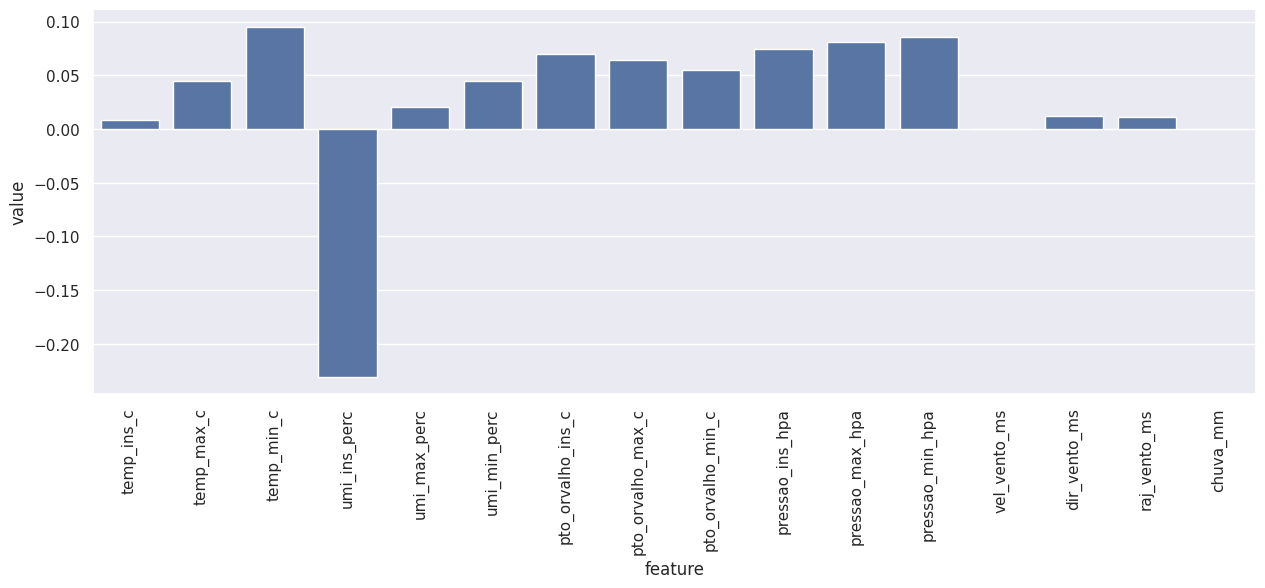

In [ ]:
anual_df = load_and_filter("teresina", 7, 18).set_index("data_hora")

cols = ["temp_ins_c",
  "temp_max_c",
  "temp_min_c",
  "umi_ins_perc",
  "umi_max_perc",
  "umi_min_perc",
  "pto_orvalho_ins_c",
  "pto_orvalho_max_c",
  "pto_orvalho_min_c",
  "pressao_ins_hpa",
  "pressao_max_hpa",
  "pressao_min_hpa",
  "vel_vento_ms",
  "dir_vento_ms",
  "raj_vento_ms",
  "chuva_mm",
  "radiacao"]

df_selected = anual_df[cols]

scaler = MinMaxScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df_selected), columns=df_selected.columns)
df_scaled = df_scaled.fillna(df_scaled.mean())

X_train = df_scaled.drop("radiacao", axis=1).values
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

Y_train = df_scaled["radiacao"].values

get_feature_importance(X_train, Y_train, cols[:-1], len(cols))